In [1]:
!pip install ultralytics opencv-python numpy pandas xgboost torch torchvision torchaudio matplotlib scipy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [7]:
!pip install deep_sort_realtime
!pip install deepface mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 35.1 MB/s eta 0:00:00


In [14]:
import cv2
import numpy as np
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort
from deepface import DeepFace
import mediapipe as mp
from google.colab.patches import cv2_imshow

In [15]:
yolo_model = YOLO("yolov8s.pt")

tracker = DeepSort(max_age=30, n_init=3, nms_max_overlap=1.0)

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

In [16]:
sam_vid= r"/content/drive/MyDrive/6387-191695740_medium.mp4"
cap = cv2.VideoCapture(sam_vid)


0: 384x640 20 persons, 570.0ms
Speed: 3.3ms preprocess, 570.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Action: age:   0%|          | 0/2 [00:00<?, ?it/s]    

25-02-28 11:52:41 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 10.5M/539M [00:00<00:05, 104MB/s]
  7%|▋         | 37.7M/539M [00:00<00:02, 202MB/s]
 13%|█▎        | 69.2M/539M [00:00<00:01, 252MB/s]
 18%|█▊        | 99.6M/539M [00:00<00:01, 271MB/s]
 24%|██▎       | 127M/539M [00:00<00:01, 257MB/s] 
 28%|██▊       | 153M/539M [00:00<00:01, 242MB/s]
 33%|███▎      | 178M/539M [00:00<00:01, 244MB/s]
 38%|███▊      | 206M/539M [00:00<00:01, 253MB/s]
 43%|████▎     | 232M/539M [00:00<00:01, 257MB/s]
 48%|████▊     | 258M/539M [00:01<00:01, 254MB/s]
 53%|█████▎    | 285M/539M [00:01<00:00, 258MB/s]
 58%|█████▊    | 311M/539M [00:06<00:14, 15.9MB/s]
 63%|██████▎   | 337M/539M [00:06<00:09, 22.1MB/s]
 68%|██████▊   | 365M/539M [00:06<00:05, 31.1MB/s]
 73%|███████▎  | 392M/539M [00:06<00:03, 42.3MB/s]
 77%|███████▋  | 417M/539M [00:06<00:02

25-02-28 11:52:56 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 9.96M/537M [00:00<00:05, 98.7MB/s]
  7%|▋         | 36.7M/537M [00:00<00:02, 197MB/s] 
 12%|█▏        | 66.6M/537M [00:00<00:01, 242MB/s]
 17%|█▋        | 91.2M/537M [00:00<00:01, 241MB/s]
 21%|██▏       | 115M/537M [00:00<00:01, 240MB/s] 
 26%|██▌       | 139M/537M [00:00<00:01, 213MB/s]
 31%|███       | 164M/537M [00:00<00:01, 221MB/s]
 35%|███▍      | 187M/537M [00:00<00:01, 220MB/s]
 40%|████      | 217M/537M [00:00<00:01, 241MB/s]
 45%|████▌     | 244M/537M [00:01<00:01, 250MB/s]
 50%|█████     | 269M/537M [00:01<00:01, 249MB/s]
 55%|█████▍    | 295M/537M [00:01<00:00, 251MB/s]
 60%|█████▉    | 322M/537M [00:01<00:00, 255MB/s]
 65%|██████▌   | 350M/537M [00:01<00:00, 260MB/s]
 70%|██████▉   | 376M/537M [00:01<00:00, 245MB/s]
 75%|███████▍  | 401M/537M [00:01<0

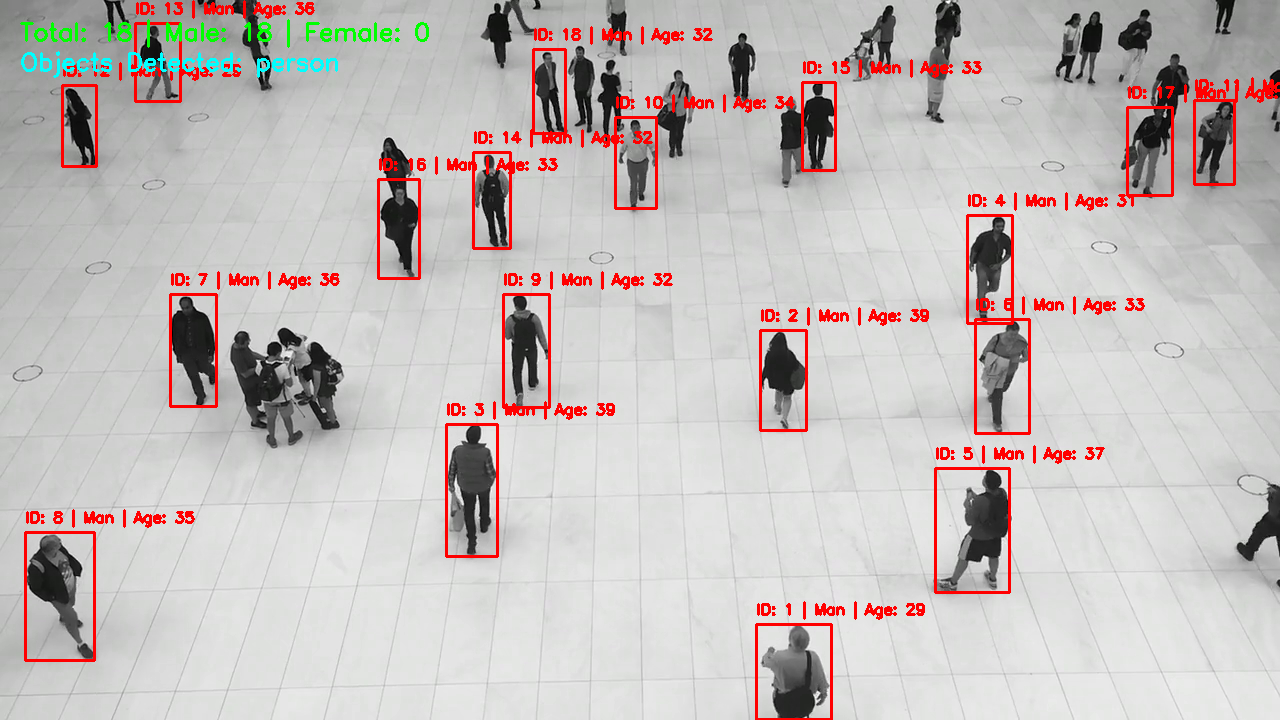


0: 384x640 20 persons, 433.5ms
Speed: 3.4ms preprocess, 433.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]


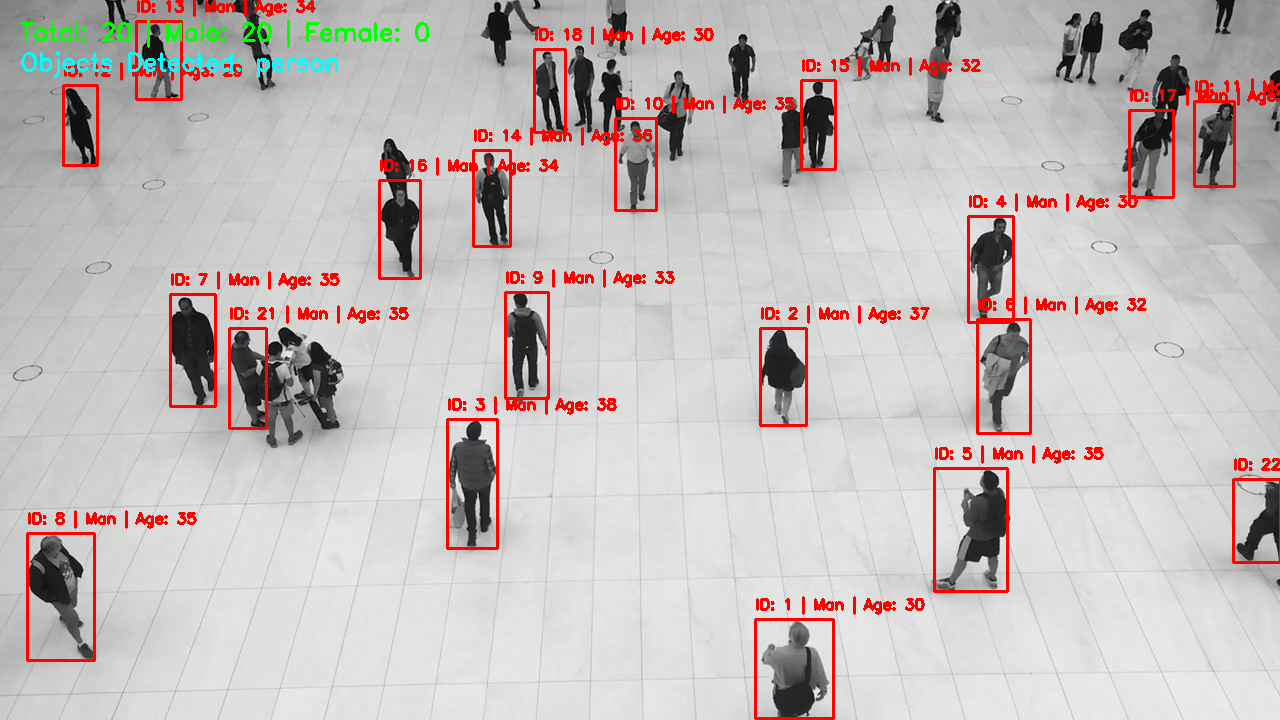


0: 384x640 20 persons, 432.2ms
Speed: 3.9ms preprocess, 432.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


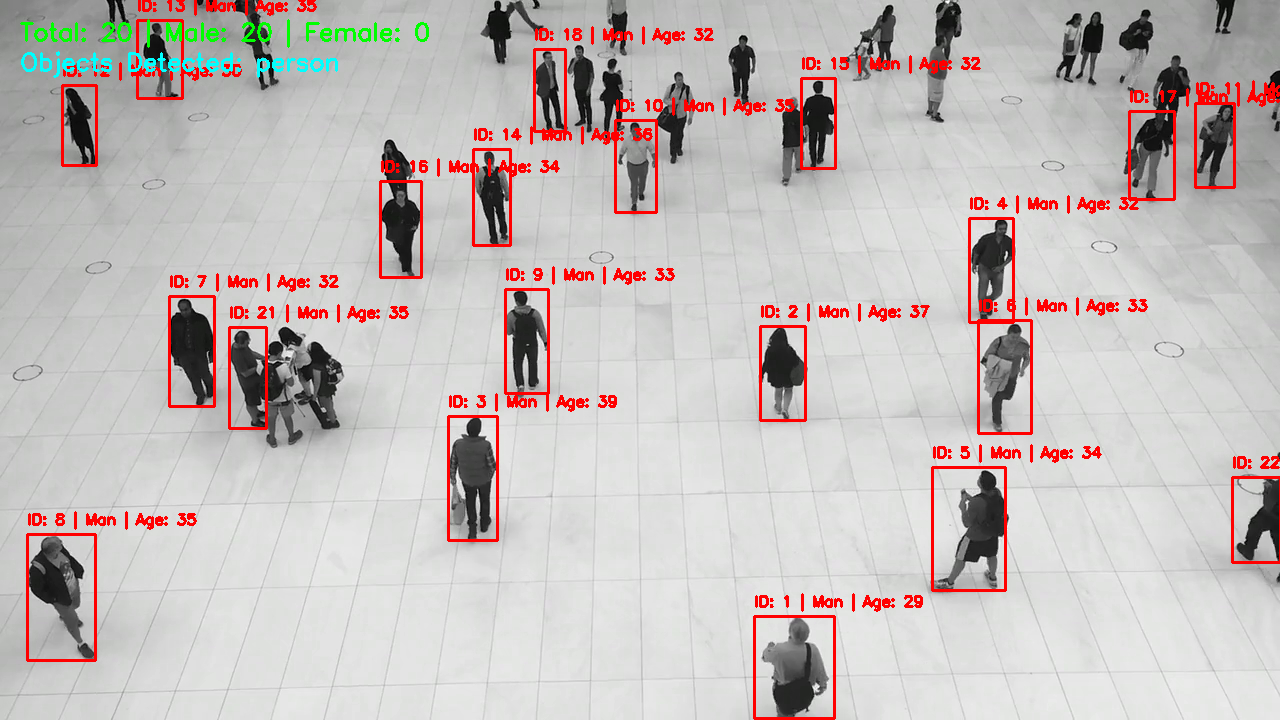


0: 384x640 19 persons, 445.4ms
Speed: 5.6ms preprocess, 445.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


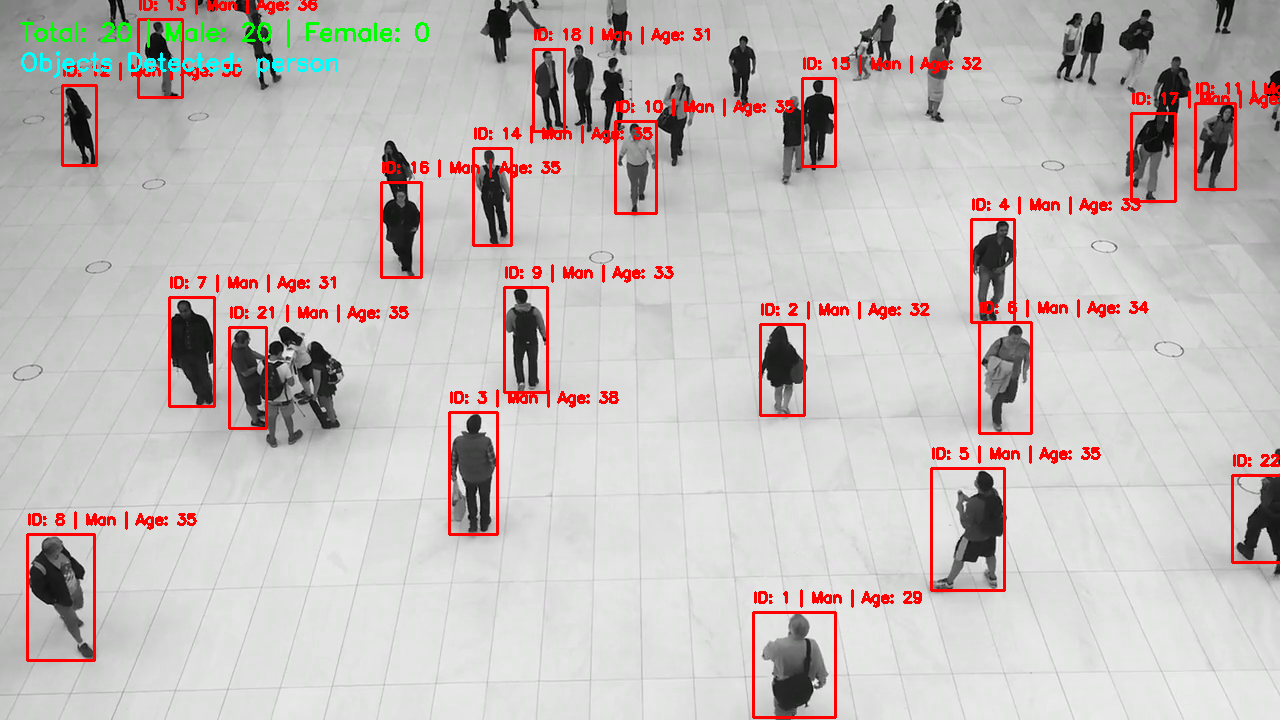


0: 384x640 20 persons, 460.2ms
Speed: 3.4ms preprocess, 460.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


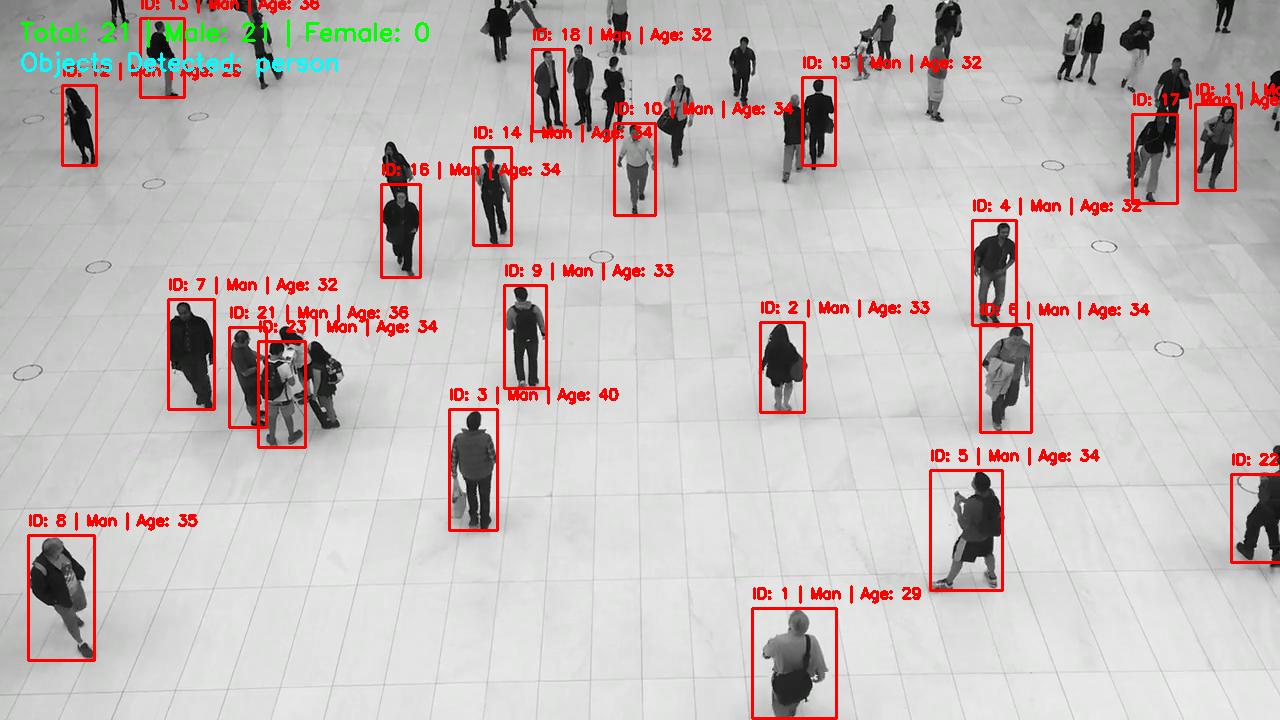


0: 384x640 22 persons, 458.0ms
Speed: 5.7ms preprocess, 458.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Action: gender: 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]


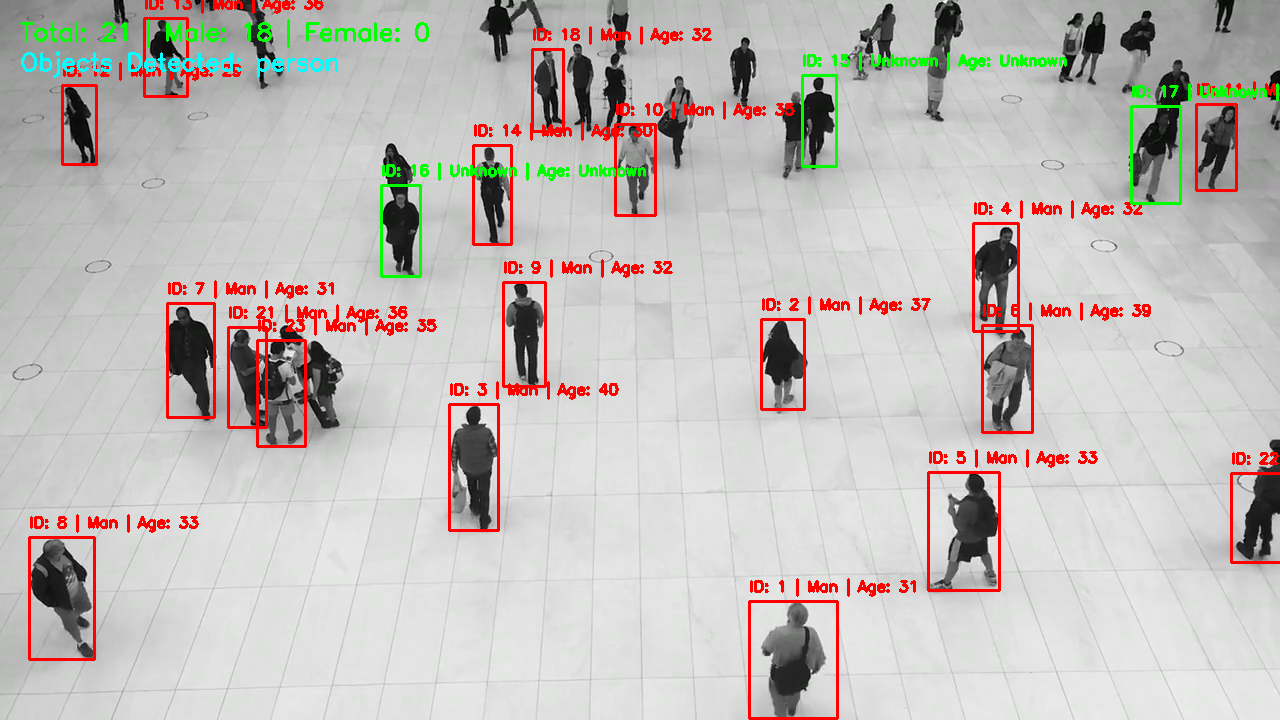

KeyboardInterrupt: 

In [19]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = yolo_model(frame, conf=0.5)

    detections = []
    objects_detected = set()
    for result in results:
        for obj in result.boxes:
            x1, y1, x2, y2 = map(int, obj.xyxy[0])
            conf = float(obj.conf[0])
            cls = int(obj.cls[0])
            class_name = yolo_model.names[cls]

            objects_detected.add(class_name)

            if class_name == "person" and conf > 0.3:
                detections.append(([x1, y1, x2 - x1, y2 - y1], conf, None))

    tracks = tracker.update_tracks(detections, frame=frame)

    total_crowd = 0
    male_count = 0
    female_count = 0

    for track in tracks:
        if not track.is_confirmed():
            continue

        track_id = track.track_id
        x1, y1, x2, y2 = map(int, track.to_ltrb())
        total_crowd += 1

        face_crop = frame[y1:y2, x1:x2] if y2 > y1 and x2 > x1 else None
        gender = "Unknown"
        age = "Unknown"
        color = (0, 255, 0)
        if face_crop.size > 0:
            try:
                if face_crop.shape[0] >= 20 and face_crop.shape[1] >= 20:
                    face_analysis = DeepFace.analyze(face_crop, actions=['age', 'gender'], enforce_detection=False)
                    gender = face_analysis[0]['dominant_gender']
                    age = int(face_analysis[0]['age'])

                    if gender == "Man":
                        male_count += 1
                        color = (0, 0, 255)
                    else:
                        female_count += 1
                        color = (255, 0, 0)
            except:
                pass

        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, f"ID: {track_id} | {gender} | Age: {age}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pose_results = pose.process(rgb_frame)
    if pose_results.pose_landmarks:
        for landmark in pose_results.pose_landmarks.landmark:
            h, w, _ = frame.shape
            x, y = int(landmark.x * w), int(landmark.y * h)
            cv2.circle(frame, (x, y), 3, (0, 255, 255), -1)

    object_text = " | ".join(objects_detected) if objects_detected else "None"
    cv2.putText(frame, f"Total: {total_crowd} | Male: {male_count} | Female: {female_count}",
                (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    cv2.putText(frame, f"Objects Detected: {object_text}", (20, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)

    cv2_imshow(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()